# Introduction

## About - Dataset:

In this Dataset, we have Historical Population data for every Country/Territory in the world by different parameters like Area Size of the Country/Territory, Name of the Continent, Name of the Capital, Density, Population Growth Rate, Ranking based on Population, World Population Percentage, etc.

## About - Project:
This World Population Data Analysis project is a component of Jovian's "Data Analysis with Python: Zero to Pandas" course. In this research, we will look into the relationship between the many characteristics of the world's population that are contained in this dataset. The graphical representation and visualization of data using the matplotlib and seaborn libraries in Python allow us to comprehend the dataset far better.

## Dataset - Source:
The dataset is obtained from <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset" target="_blank">Kaggle</a>.

Please click <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset" target="_blank">here</a> to know more about the dataset.


## Download the Dataset:
There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI

* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL

* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

Initially, I manually downloaded and uploaded the dataset vi Jupyter's GUI. Later, I uploaded the same dataset to my Github profile

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Collecting Data

In [5]:
world_pop_df = pd.read_csv('world_population.csv')

#Extract a copy of raw df to keep the raw df unaffected / untouched 
world_pop_df_copy = world_pop_df.copy()
world_pop_df_copy

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


## a. Data shape

In [6]:
print(f'The dataset has {world_pop_df_copy.shape[0]} rows')
print(f'The dataset has {world_pop_df_copy.shape[1]} columns')

#drop the CCA3 column which is not necessary for the project 
world_pop_df_copy.drop(['CCA3'],axis=1, inplace =True, errors = 'ignore')

The dataset has 234 rows
The dataset has 17 columns


## b. Are there duplicates in dataset ?

In [7]:
num_dup = world_pop_df_copy.shape[0] - world_pop_df_copy.drop_duplicates().shape[0]
print(f'The dataset has {num_dup} duplicates')

The dataset has 0 duplicates


## c. Are there odd data types ?

In [8]:
world_pop_df_copy.dtypes

Rank                             int64
Country                         object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

**<font size ='3'> The data types are normal</font>**

## d. Lack of data ?

In [9]:
overall_world_pop = world_pop_df_copy.isna().sum()
overall_world_pop

Rank                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

**<font size ='3'> None of the column has any NaN values</font>**

# 2. Exploratory analysis

## a.  Discover numeric data

In [10]:
num_df = world_pop_df_copy.select_dtypes(['float64', 'int64'])
num_df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Text(0.5, 1.0, 'World Population from 1970-2022')

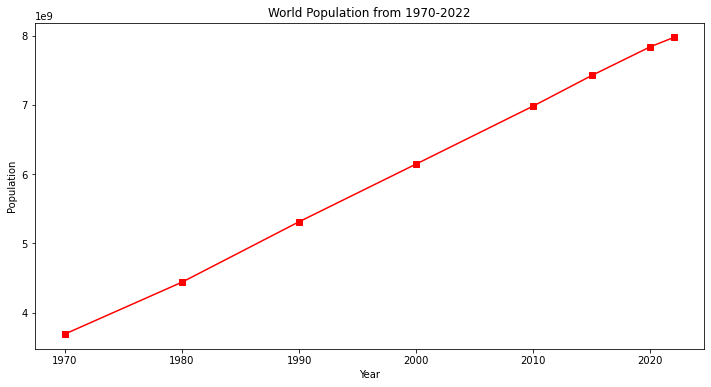

In [47]:
#sum of all columns of the dataset
sum_columns=world_pop_df_copy.groupby(by='Country').sum().sum()

#sum of population through each year
sum_year_pop=sum_columns[1:9].sort_values(ascending=True)
sum

# Year dataframe
years=[1970,1980,1990,2000,2010,2015,2020,2022]

#create line chart
plt.figure(figsize=(12,6))
plt.plot(years, sum_year_pop, 's-r')

plt.xlabel('Year')
plt.ylabel('Population')

plt.title("World Population from 1970-2022")

## 6. Khám phá dữ liệu category

In [11]:
cate_df =df.select_dtypes('object')
cate_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
2,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
3,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
4,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no


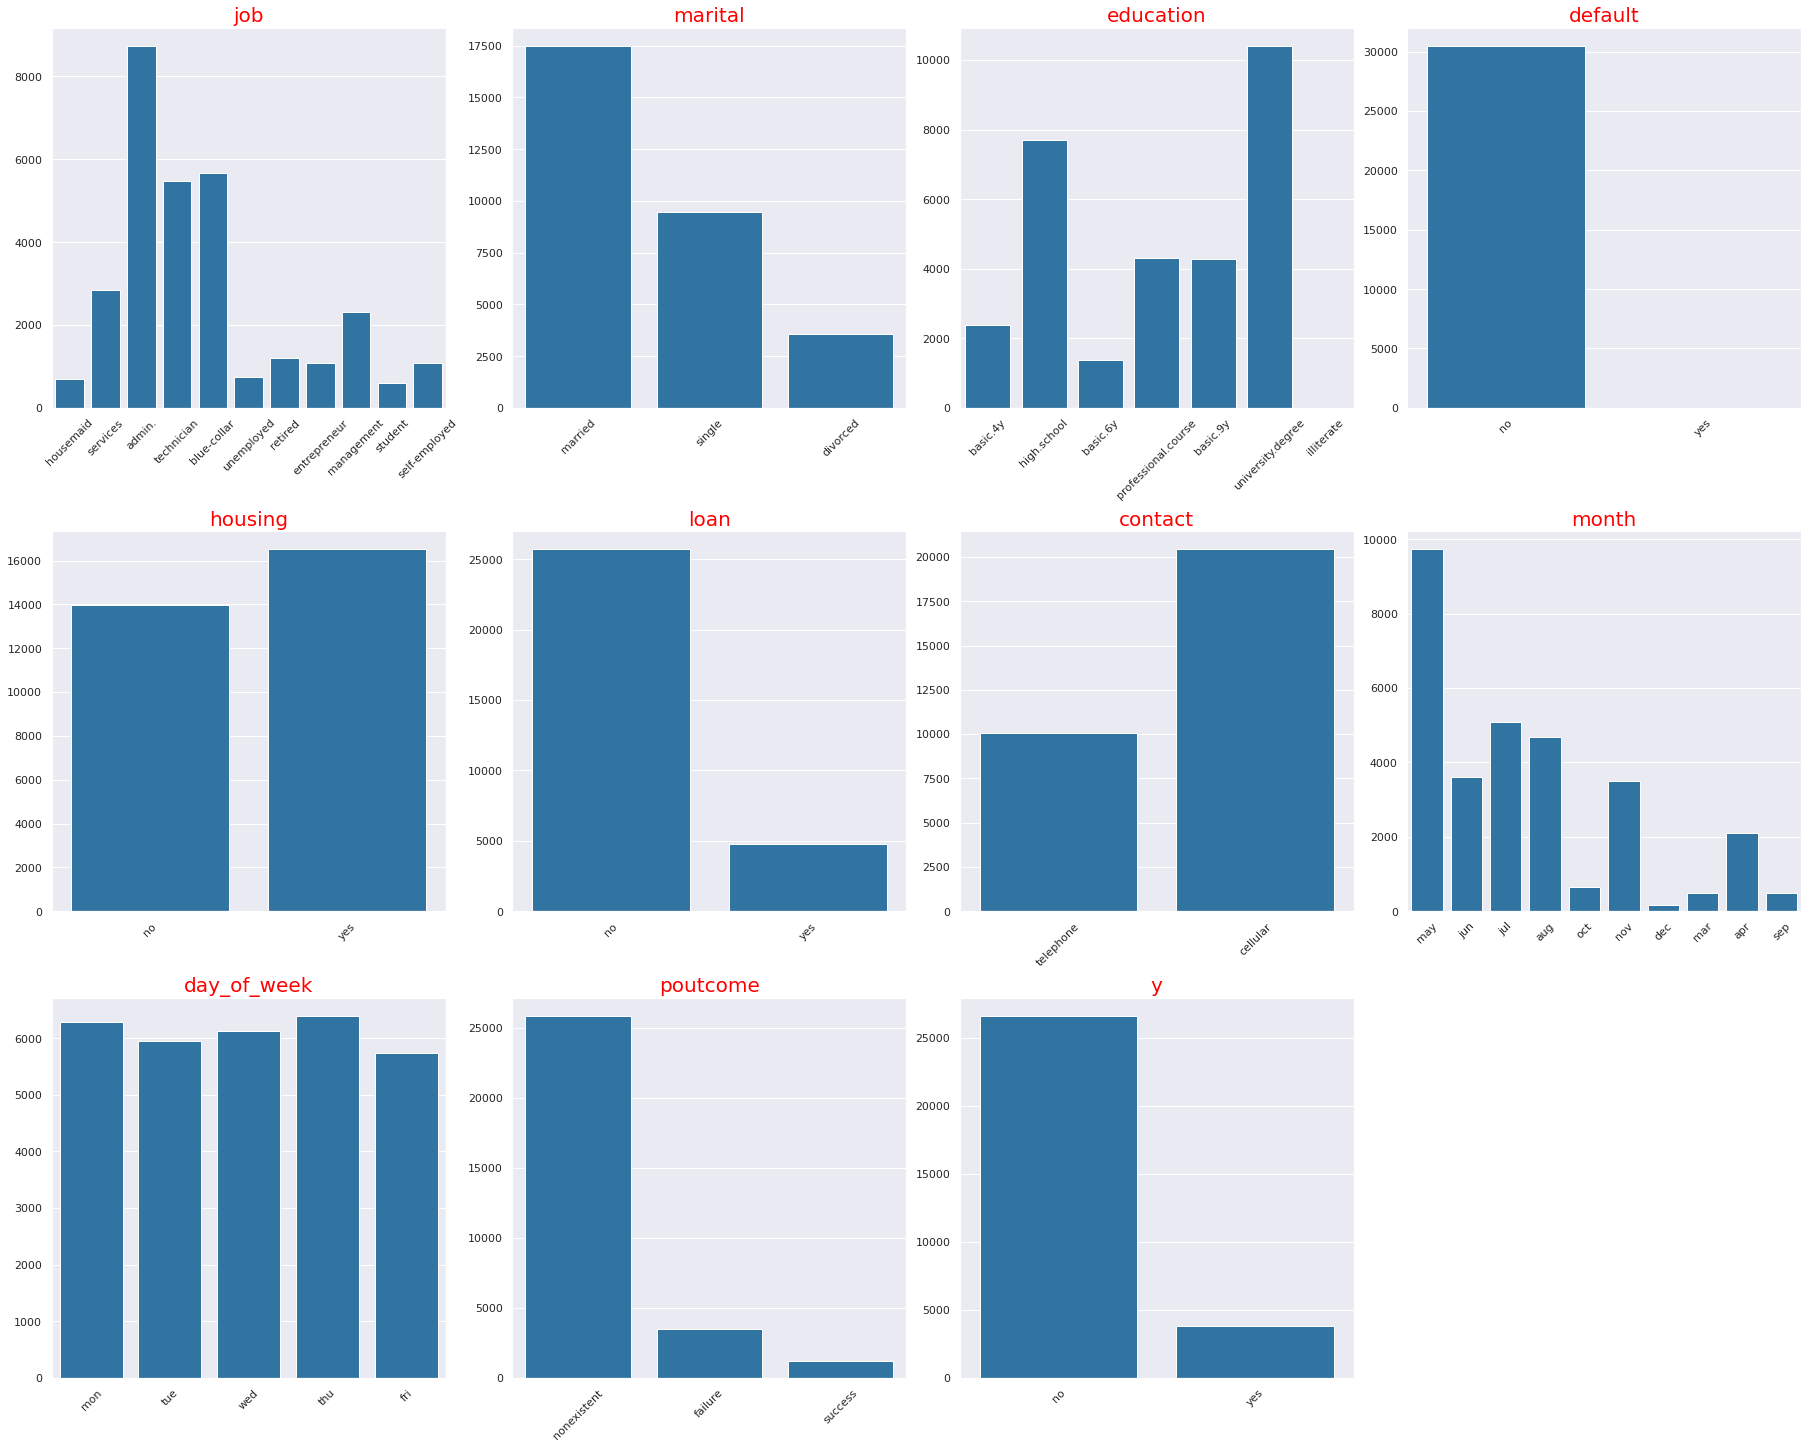

In [12]:
fig, axs = plt.subplots(3,4,constrained_layout = True, figsize = (25,20))
for idx in range(cate_df.shape[1]):
    r, c = idx // 4, idx % 4
    sns.countplot(x = cate_df.iloc[:,idx], ax = axs[r,c], color = 'tab:blue')

    axs[r,c].set_title(f'{cate_df.columns[idx]}', fontsize = 20, color = 'red')
    axs[r,c].tick_params('x', rotation = 45)
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)

axs[2,3].set_visible(False)

- <font size = '4'>Có thể thấy, cột y là giá trị phải dự đoán bị `imbalanced` </font>

# 2. EDA

## 1. Thống kê số lượng các khoản nợ và tỷ lệ đăng ký theo nghề nghiệp

In [13]:
job_df = pd.DataFrame(columns = ['job','default','housing', 'loan', 'y'])
group_job_df = df.groupby('job')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_job_df:
    row = pd.DataFrame(job_df.columns)
    row['job'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    job_df = pd.concat((job_df,row))
    
job_df = job_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
job_df

,job,default,housing,loan,y
0,admin.,0,4777,1484,1215
1,blue-collar,0,3017,893,452
2,entrepreneur,0,602,159,101
3,housemaid,0,364,97,87
4,management,0,1221,355,286
5,retired,0,662,166,357
6,self-employed,0,592,154,132
7,services,0,1501,433,258
8,student,0,328,102,203
9,technician,2,3033,811,641


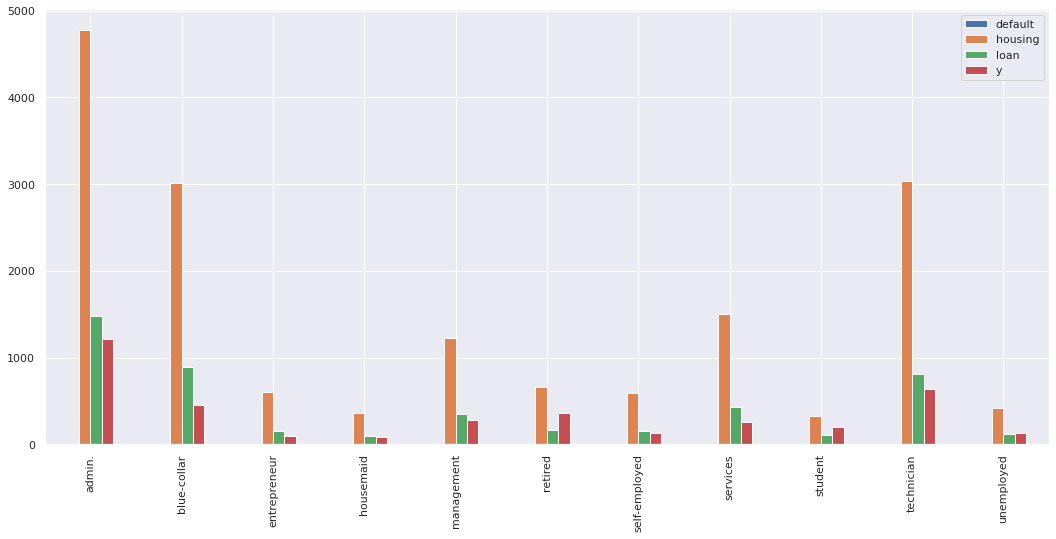

In [14]:
plt.rcParams['figure.figsize'] = (18,8)
ax = job_df.plot.bar()
ax.set_xticks(ticks = np.arange(11),labels = job_df['job'])
plt.show()

## 2. Thống kế số lượng các khoản nợ và tỷ lệ đăng ký theo tình trạng hôn nhân

In [15]:
marital_df = pd.DataFrame(columns = ['marital','default','housing', 'loan', 'y'])
group_marital_df = df.groupby('marital')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_marital_df:
    row = pd.DataFrame(marital_df.columns)
    row['marital'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    marital_df = pd.concat((marital_df,row))
    
marital_df = marital_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
marital_df

,marital,default,housing,loan,y
0,divorced,0,1909,538,410
1,married,3,9423,2746,2055
2,single,0,5184,1484,1393


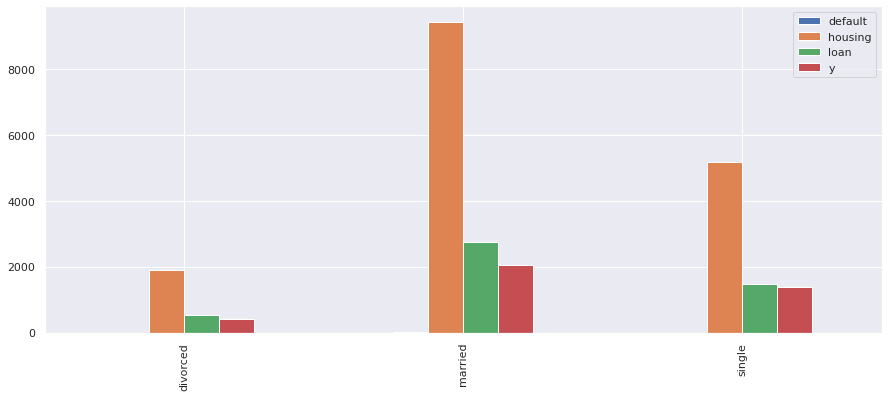

In [16]:
plt.rcParams['figure.figsize'] = (15,6)
ax = marital_df.plot.bar()
ax.set_xticks(ticks = np.arange(3),labels = marital_df['marital'])
plt.show()

## 3. Thống kế số lượng các khoản nợ và tỷ lệ đăng ký theo trình độ học vấn

In [17]:
education_df = pd.DataFrame(columns = ['education','default','housing', 'loan', 'y'])
group_education_df = df.groupby('education')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_education_df:
    row = pd.DataFrame(education_df.columns)
    row['education'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    education_df = pd.concat((education_df,row))
    
education_df = education_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
education_df

,education,default,housing,loan,y
0,basic.4y,0,1228,355,326
1,basic.6y,0,738,210,136
2,basic.9y,0,2330,659,380
3,high.school,1,4074,1200,934
4,illiterate,0,6,0,3
5,professional.course,2,2407,665,538
6,university.degree,0,5733,1679,1541


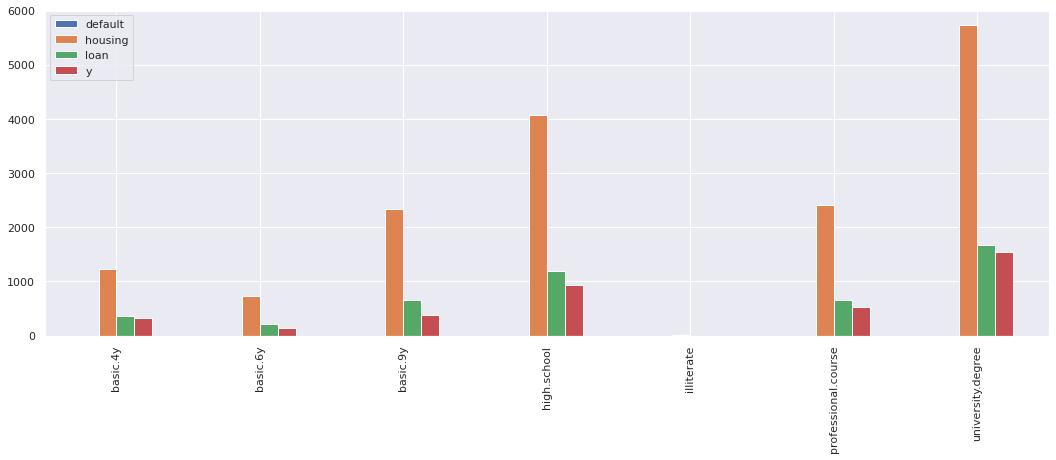

In [18]:
plt.rcParams['figure.figsize'] = (18,6)
ax = education_df.plot.bar()
ax.set_xticks(ticks = np.arange(7),labels = education_df['education'])
plt.show()

## 4. Xu hướng thay đổi các thuộc tính `social và economic context`

In [19]:
social_economic_df = df[['emp.var.rate','cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']]

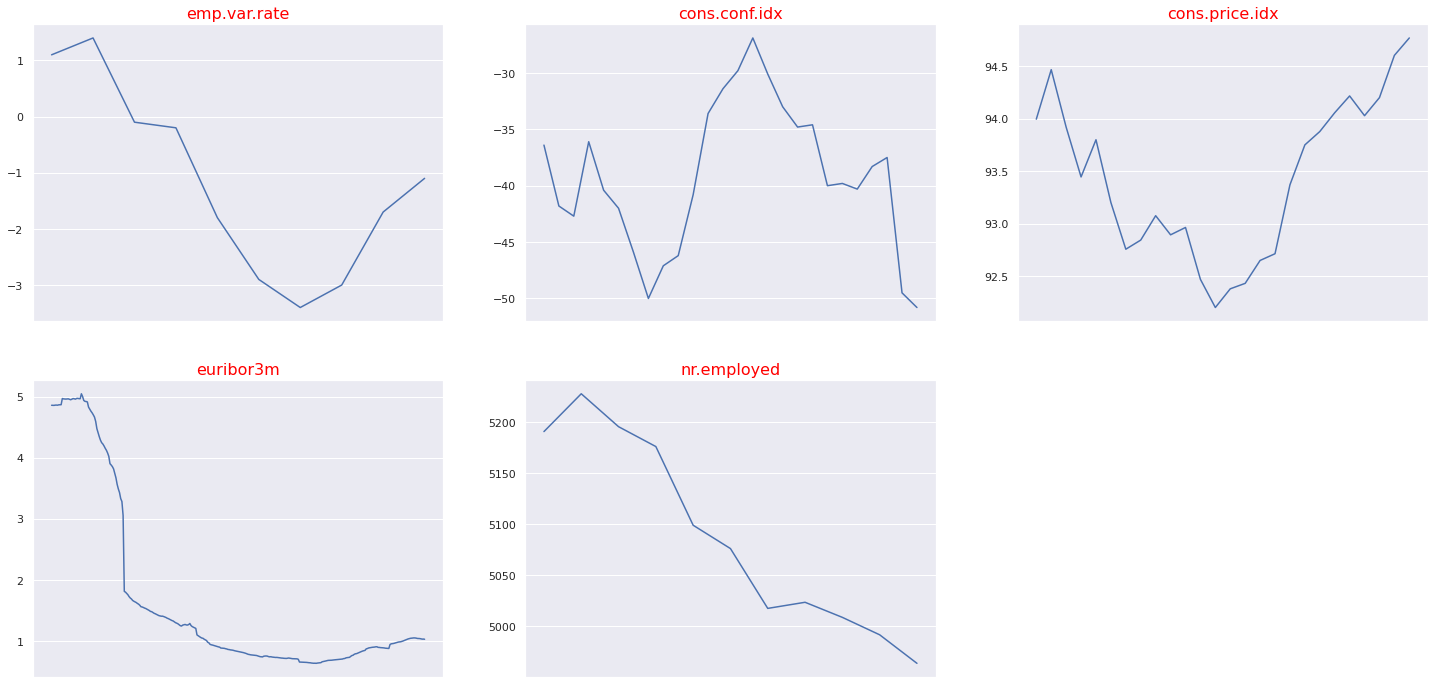

In [20]:
fig, axs = plt.subplots(2,3, figsize = (25,12))
for idx in range(social_economic_df.shape[1]):
    r,c = idx // 3, idx % 3
    sns.lineplot(data = social_economic_df.iloc[:,idx].unique(), ax = axs[r,c])
    axs[r,c].set_title(f'{social_economic_df.columns[idx]}', fontsize = 16, color = 'red')
    axs[r,c].xaxis.set_visible(False)

axs[1,2].set_visible(False)

# 3. Chuẩn hóa và mã hóa dữ liệu

In [21]:
scale_df = pd.DataFrame()

## 1. Chuẩn hóa dữ liệu

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scale = StandardScaler()
scale_df[num_df.columns] = scale.fit_transform(df[num_df.columns])
scale_df[num_df.columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642408,0.005681,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
1,-0.196436,-0.128039,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
2,0.093908,-0.414580,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
3,1.642408,0.181426,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
4,1.932752,-0.460427,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639


## 2. Mã hóa dữ liệu

In [24]:
scale_df = pd.concat((scale_df,pd.get_dummies(df[cate_df.drop(columns = 'y').columns])), axis = 1)
scale_df.head()                    

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.642408,0.005681,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,0,1,0,0,0,0,1,0
1,-0.196436,-0.128039,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,0,1,0,0,0,0,1,0
2,0.093908,-0.414580,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,0,1,0,0,0,0,1,0
3,1.642408,0.181426,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,0,1,0,0,0,0,1,0
4,1.932752,-0.460427,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,0,1,0,0,0,0,1,0


In [25]:
scale_df['y'] = df['y'].replace(['yes', 'no'], [1,0])

# 4. Resampling dữ liệu

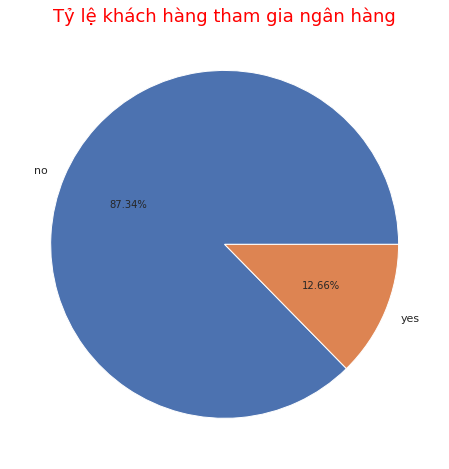

In [26]:
plt.rcParams['figure.figsize'] = 15, 8
ax = df['y'].value_counts().plot.pie(labels = ['no', 'yes'], autopct='%.2f%%')
plt.title('Tỷ lệ khách hàng tham gia ngân hàng', fontsize = 18, color = 'red')
ax.yaxis.set_visible(False)
plt.show()

- <font size = '4'>Tỷ lệ khách hàng mất cân bằng nên sẽ ảnh hưởng tới mô hình Classification. Một trong 2 cách thường dùng:</font>
    - <font size = '4'>Sử dụng Oversampling ngẫu nhiên tăng số lượng label `yes`</font>
    - <font size = '4'>Sử dụng OverSampling (SMOTE) cho label `yes`</font>

In [27]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [28]:
yes_df = scale_df[scale_df['y'] == 1]
no_df = scale_df[scale_df['y'] == 0]

## 1. Random OverSampling

In [29]:
up_yes_df = resample(yes_df, n_samples=no_df.shape[0], random_state=42)
up_scale_df = pd.concat((up_yes_df, no_df), axis = 0)
up_scale_df['y'].value_counts()

1    26620
0    26620
Name: y, dtype: int64

In [30]:
up_scale_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
29125,-0.002874,0.261658,-0.191777,-4.718525,5.366061,-1.073462,0.602409,0.125833,-1.562570,-2.023949,...,0,0,0,1,0,0,0,0,1,1
29760,-0.486780,-0.036345,-0.559363,-4.698665,3.453479,-1.011361,0.860371,0.480835,-1.440466,-2.251472,...,0,0,0,0,0,1,1,0,0,1
17376,-0.389999,2.137550,0.175809,0.211923,-0.371685,-0.017745,-0.552442,-0.291816,0.371387,0.465506,...,0,0,0,0,0,1,0,1,0,1
21088,1.448846,-0.093654,-0.191777,0.211923,-0.371685,-1.073462,-0.765987,-1.356820,-1.156309,-0.821134,...,0,0,0,0,1,0,0,1,0,1
19813,-1.357812,-0.555941,-0.559363,0.211923,-0.371685,-1.073462,-0.765987,-1.356820,-1.133802,-0.821134,...,0,0,0,0,0,1,0,1,0,1


## 2. OverSampling với SMOTE

In [31]:
X = scale_df.drop(columns = 'y')
y = scale_df['y']

In [32]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)
y_smote.value_counts()

0    26620
1    26620
Name: y, dtype: int64

In [33]:
over_scale_df = pd.concat((X_smote,y_smote), axis = 1)
over_scale_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.642408,0.005681,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,1,0,0,0,0,1,0,0
1,-0.196436,-0.128039,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,1,0,0,0,0,1,0,0
2,0.093908,-0.414580,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,1,0,0,0,0,1,0,0
3,1.642408,0.181426,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,1,0,0,0,0,1,0,0
4,1.932752,-0.460427,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639,...,0,0,1,0,0,0,0,1,0,0


# 5. Xây dựng mô hình dự báo

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 1. Logistic Classification

In [35]:
from sklearn.linear_model import LogisticRegression

### 1. Huấn luyện mô hình với dữ liệu Random OverSampling

In [36]:
# Random OverSampling
X = up_scale_df.drop(columns = 'y')
y = up_scale_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
logistic_model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [38]:
# Tập train
y_train_pred = logistic_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     21291
           1       0.85      0.88      0.87     21301

    accuracy                           0.86     42592
   macro avg       0.86      0.86      0.86     42592
weighted avg       0.86      0.86      0.86     42592



In [39]:
# Tập test
y_test_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5329
           1       0.86      0.88      0.87      5319

    accuracy                           0.87     10648
   macro avg       0.87      0.87      0.87     10648
weighted avg       0.87      0.87      0.87     10648



### Nhận xét:
- <font size='3'>Mô hình dự báo khá tốt về khi sử dụng Random OverSampling</font>
- <font size='3'>Ta chỉ xét ở `precision và recall` thì ta thấy mô hình dữ báo `~ 90%` ở cả tập train và tập test</font>

---

### 2.  Huấn luyện mô hình với dữ liệu OverSampling SMOTE

In [40]:
# OverSampling
X = over_scale_df.drop(columns = 'y')
y = over_scale_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
logistic_model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [42]:
# Tập train
y_train_pred = logistic_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     21307
           1       0.95      0.91      0.93     21285

    accuracy                           0.93     42592
   macro avg       0.93      0.93      0.93     42592
weighted avg       0.93      0.93      0.93     42592



In [43]:
# Tập test
y_test_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5313
           1       0.95      0.92      0.93      5335

    accuracy                           0.94     10648
   macro avg       0.94      0.94      0.94     10648
weighted avg       0.94      0.94      0.94     10648



### Nhận xét:
- <font size='3'>Mô hình dự báo tốt hơn Random OverSampling khi dùng OverSampling SMOTE</font>
- <font size='3'>Ta chỉ xét ở `precision và recall` thì ta thấy mô hình dữ báo `> 90%` ở cả tập train và tập test</font>

## 2. Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier

### 1. Huấn luyện mô hình không sử dụng SMOTE

In [45]:
X = scale_df.drop(columns = 'y')
y = scale_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_clf = RandomForestClassifier(max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [47]:
# Tập train
y_train_pred = rf_clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     21311
           1       0.89      0.47      0.61      3071

    accuracy                           0.93     24382
   macro avg       0.91      0.73      0.78     24382
weighted avg       0.92      0.93      0.91     24382



In [48]:
# Tập test
y_test_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5309
           1       0.77      0.38      0.51       787

    accuracy                           0.90      6096
   macro avg       0.84      0.68      0.73      6096
weighted avg       0.90      0.90      0.89      6096



### Nhận xét:
- <font size='3'>Dù mô hình có `accuracy` cao nhưng `recall` và `precision` ở label `yes` khá thấp.</font>
- <font size ='3'>Mô hình chỉ đúng ở tập ở dữ liệu đã huấn luyện, không tốt khi gặp dữ liệu mới</font>

### 2. Huấn luyện mô hình sử dụng SMOTE 

In [49]:
X = over_scale_df.drop(columns = 'y')
y = over_scale_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
rf_clf = RandomForestClassifier(max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [51]:
# Tập train
y_train_pred = rf_clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     21307
           1       0.90      0.97      0.93     21285

    accuracy                           0.93     42592
   macro avg       0.93      0.93      0.93     42592
weighted avg       0.93      0.93      0.93     42592



In [52]:
# Tập test
y_test_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5313
           1       0.88      0.96      0.91      5335

    accuracy                           0.91     10648
   macro avg       0.91      0.91      0.91     10648
weighted avg       0.91      0.91      0.91     10648



### Nhận xét:
- <font size='3'>Mô hình dự báo tốt hơn khi dùng OverSampling.</font>
- <font size ='3'>`precision` và `recall` cao -> mô hình tốt với dữ liệu mới </font>

## 3. XGBoost

In [53]:
from xgboost import XGBClassifier

In [94]:
X = over_scale_df.drop(columns = 'y')
y = over_scale_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# xét learning_rate = 0.1, n_estimators = 100
xgb = XGBClassifier(n_estimators = 50, max_depth = 10, n_jobs = 5,
                    random_state = 42, learning_rate = 0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=5,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
# Tập train
y_train_pred = xgb.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     21307
           1       0.97      0.99      0.98     21285

    accuracy                           0.98     42592
   macro avg       0.98      0.98      0.98     42592
weighted avg       0.98      0.98      0.98     42592



In [97]:
# Tập test
y_test_pred = xgb.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5313
           1       0.92      0.96      0.94      5335

    accuracy                           0.94     10648
   macro avg       0.94      0.94      0.94     10648
weighted avg       0.94      0.94      0.94     10648



### Nhận xét:
- <font size='3'>Đây là mô hình tốt nhất (chưa xét Deep Learning) trên cả tập train và tập test.</font>
- <font size ='3'>`precision` và `recall` rất cao -> mô hình tốt với dữ liệu mới </font>

## 4. Deep Learning

In [58]:
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [59]:
X = over_scale_df.drop(columns = 'y')
y = over_scale_df['y']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Sử dụng ANN trên tập Over Sampling

In [83]:
model = Sequential()
# layers
model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
# compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                3712      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [61]:
# checkpoint to save the best model
model_checkpoint_callback = ModelCheckpoint(
    filepath = './',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [66]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 10, 
          validation_data=(X_val,y_val), callbacks=[model_checkpoint_callback]);

Epoch 1/10
3408/3408 [==============================] - 6s 2ms/step - loss: 0.1214 - accuracy: 0.9455 - val_loss: 0.1403 - val_accuracy: 0.9360
Epoch 2/10
3408/3408 [==============================] - 6s 2ms/step - loss: 0.1192 - accuracy: 0.9453 - val_loss: 0.1406 - val_accuracy: 0.9319
Epoch 3/10
3408/3408 [==============================] - 5s 2ms/step - loss: 0.1182 - accuracy: 0.9469 - val_loss: 0.1456 - val_accuracy: 0.9318
Epoch 4/10
3408/3408 [==============================] - 5s 1ms/step - loss: 0.1165 - accuracy: 0.9471 - val_loss: 0.1468 - val_accuracy: 0.9326
Epoch 5/10
3408/3408 [==============================] - 5s 2ms/step - loss: 0.1155 - accuracy: 0.9466 - val_loss: 0.1385 - val_accuracy: 0.9350
Epoch 6/10
3408/3408 [==============================] - 5s 2ms/step - loss: 0.1120 - accuracy: 0.9491 - val_loss: 0.1474 - val_accuracy: 0.9340
Epoch 7/10
3408/3408 [==============================] - 5s 2ms/step - loss: 0.1138 - accuracy: 0.9504 - val_loss: 0.1380 - val_accuracy:

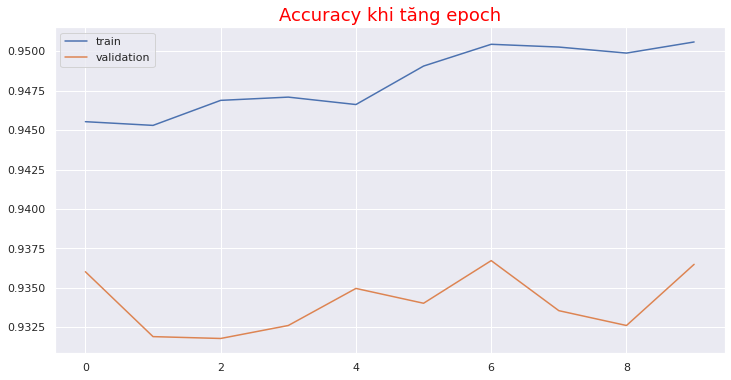

In [85]:
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(np.arange(10), history.history['accuracy'], label = 'train')
plt.plot(np.arange(10), history.history['val_accuracy'], label = 'validation')
plt.title('Accuracy khi tăng epoch', fontsize = 18, color = 'red')
plt.legend()
plt.show()

In [63]:
# save model
model.save('./ANN')

INFO:tensorflow:Assets written to: ./ANN/assets


In [64]:
# Tập test
model = load_model('ANN')
metrics = model.evaluate(X_test, y_test)
print(classification_report(np.round(model.predict(X_test),0),y_test))

333/333 [==============================] - 0s 774us/step
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      5176
         1.0       0.95      0.93      0.94      5472

    accuracy                           0.94     10648
   macro avg       0.94      0.94      0.94     10648
weighted avg       0.94      0.94      0.94     10648



### Nhận xét:
- <font size='3'>Mô hình dự báo tốt trên cả tập trên và tập test.</font>
- <font size='3'>Data không quá lớn nên số lượng hidden layers tốt nhất là 2-3</font>
- <font size ='3'>Có thể tốt hơn bằng cách tăng số lượng `epoch` và giảm số lượng `batch_size` nhưng không nên quá chênh lệch vì có thể dẫn tới `overfit` </font>